## Steps-
### 1. Data Reading and Cleaning
### 2. Data Preparation
### 3. KMeans
### 4. Hierarchical
### 5. Cluster Analysis & Comparison

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### 1. Data Reading and Understanding

In [3]:
df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
round(100*df.isna().sum()/df.shape[0], 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

### 3. Data Preparation

- R (Recency) : number of days since last purchase
- F (Frequency) : number of transactions
- M (Monetary Value) : amount of transactions (revenue contributed)

In [10]:
df["Amount"] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [11]:
grouped_df = df.groupby("CustomerID")["Amount"].sum().reset_index()
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
frequency = df.groupby("CustomerID")["InvoiceNo"].count().reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
frequency.columns = ["CustomerID", "Frequency"]
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
grouped_df = pd.merge(grouped_df, frequency, on="CustomerID", how="inner")
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


#### Converting the InvoiceDate column to datetime type

In [15]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%d-%m-%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [17]:
max_date = max(df.InvoiceDate)

In [18]:
df["Date_difference"] = max_date - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date_difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
recency = df.groupby("CustomerID")["Date_difference"].min().reset_index()
recency.head()

,CustomerID,Date_difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
recency.columns = ["CustomerID", "Recency"]

In [21]:
grouped_df = pd.merge(grouped_df, recency, on="CustomerID", how="inner")
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [22]:
grouped_df.Recency = grouped_df.Recency.dt.days
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Outlier Treatment:-
1. Statistical
2. Domain Knowledge Based<br>
Let's proceed with the statistical way

In [23]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


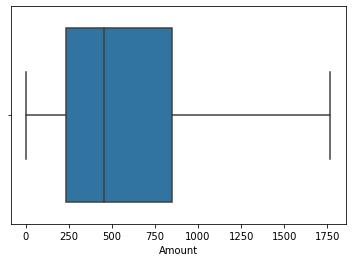

In [24]:
# Identifying the range of values for Amount which totally removes the outliers

sns.boxplot(grouped_df.Amount[(grouped_df.Amount <= 1769) & (grouped_df.Amount >= 0)])
plt.show()

In [25]:
# Removing the outliers for Amount column

grouped_df = grouped_df[(grouped_df.Amount <= 1769) & (grouped_df.Amount >= 0)]

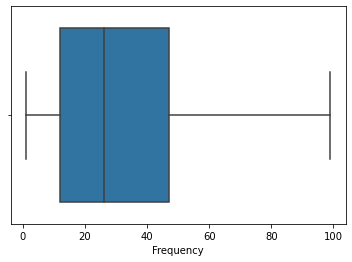

In [26]:
# Frequency range which removes the outliers

sns.boxplot(grouped_df.Frequency[grouped_df.Frequency <= 99])
plt.show()

In [27]:
# Removing the outliers of Frequency

grouped_df = grouped_df[grouped_df.Frequency <= 99]

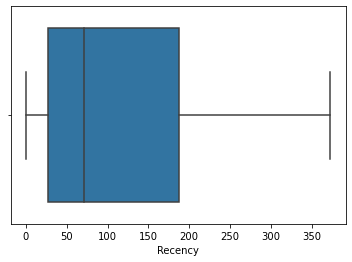

In [28]:
# Range of values of Recency which removes outliers 

sns.boxplot(grouped_df.Recency)
plt.show()

#### Outlier treatment is done

#### Normalization

In [29]:
rfm_df = grouped_df.drop(columns="CustomerID")
rfm_df.head()

,Amount,Frequency,Recency
0,0.00,2,325
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35
6,89.00,4,203


In [30]:
scaler = MinMaxScaler()

rfm_df = scaler.fit_transform(rfm_df)

In [31]:
rfm_df

array([[0.        , 0.01020408, 0.87131367],
       [0.99535044, 0.73469388, 0.04825737],
       [0.18938021, 0.16326531, 0.82841823],
       ...,
       [0.10227891, 0.09183673, 0.74262735],
       [0.04577066, 0.06122449, 0.48257373],
       [0.10001359, 0.12244898, 0.01876676]])

In [32]:
rfm_df = pd.DataFrame(rfm_df)
rfm_df.columns = ["Amount", "Frequency", "Recency"]
rfm_df.head()

,Amount,Frequency,Recency
0,0.000000,0.010204,0.871314
1,0.995350,0.734694,0.048257
2,0.189380,0.163265,0.828418
3,0.875210,0.959184,0.093834
4,0.050403,0.030612,0.544236


### Hopkins Statistic:-
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency. In other words, how well the data can be clustered.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [33]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

On multiple iterations of Hopkins Statistic, you would be getting multiple values since the algorithm uses some randomisation in the initialisation part of the code. Therefore it is advised to run it a couple of times before confirming whether the data is suitable for clustering or not.

In [34]:
hopkins(rfm_df)

0.7754780882113592

#### The value is 0.77 which indicates that the data shows high clustering tendency, which is good.

## KMeans Clustering

In [35]:
km = KMeans(n_clusters=5, max_iter=100)

km.fit(rfm_df)

KMeans(max_iter=100, n_clusters=5)

In [36]:
km.labels_

array([3, 4, 3, ..., 3, 3, 1])

### Finding the Optimal number of clusters
1. Domain Knowledge - Most Prominent
2. Elbow Curve Method
    - Calculate the loss(inertia_) for few values of K
    - Select the K after which the drop in inertia_ is not significant
3. Silhouette Analysis

#### Elbow Curve Method
- Lesser the inertia, better the model
- Inertial will always drop as number of clusters increase`
- We choose the K after which the drop in inertia is not significant

In [37]:
ssd = []
for num_clusters in range(2, 9):
    km = KMeans(n_clusters=num_clusters, max_iter=100)
    km.fit(rfm_df)
    ssd.append(km.inertia_)

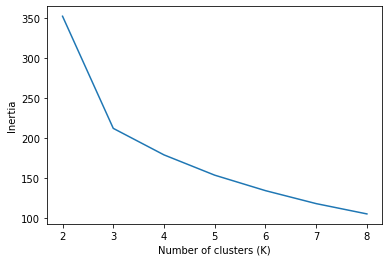

In [38]:
plt.plot(ssd)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.xticks(ticks=range(7), labels=range(2, 9))
plt.show()

- The drop in inertia is not significant after K = 3
- We can choose K = 3 as the appropriate number of clusters

#### Silhouette Analysis
<br>
<center>Silhouette score = (p - q) / max(p, q)</center><br>
p is the mean distance to the points in the nearest cluster that the data point is not part of<br>
<br>
q is the mean intra-cluster distance to all the points in its own cluster<br>
<br>
- The value of silhouette score lies between -1 and 1<br>
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster<br>
- A score closer to -1 indicates that the data point is not similar to other data points in it's cluster<br>

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
sss = []
for num_clusters in range(2, 9):
    km = KMeans(n_clusters=num_clusters, max_iter=100)
    km.fit(rfm_df)
    s_score = silhouette_score(rfm_df, km.labels_)
    sss.append(s_score)

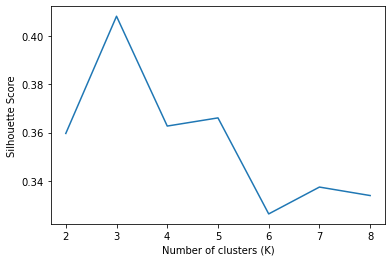

In [41]:
plt.plot(sss)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(range(7), range(2, 9))
plt.show()

- More the silhouette score, better the model
- K = 2 is the best value according to silhouette score

- We can get around a range of values using the combination of Elbow method and Silhouette Analysis
- And then get to the best value of K using the business domain
- For now, let's take K = 3 as the best value

In [42]:
# Final Model with K = 3

km = KMeans(n_clusters=3)

km.fit(rfm_df)

KMeans(n_clusters=3)

In [43]:
grouped_df["Cluster"] = km.labels_

grouped_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster
0,12346.0,0.00,2,325,0
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,2
6,12353.0,89.00,4,203,0


### Cluster Analysis

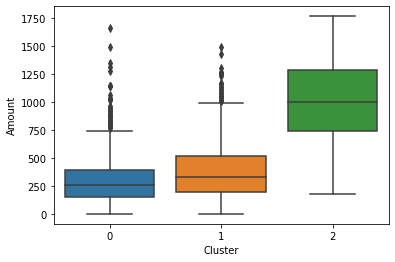

In [44]:
# Amount corresponding to the three Clusters

sns.boxplot(x="Cluster", y="Amount", data=grouped_df)
plt.show()

- Cluster 2 is the most valuable and cluster 0 is the least valuable in terms of amount

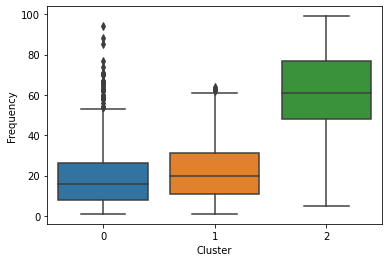

In [45]:
# Frequency corresponding to the three clusters

sns.boxplot(x="Cluster", y="Frequency", data=grouped_df)
plt.show()

- Cluster 0 is the least valuable and cluster 2 is the most valuable in terms of frequency of purchase

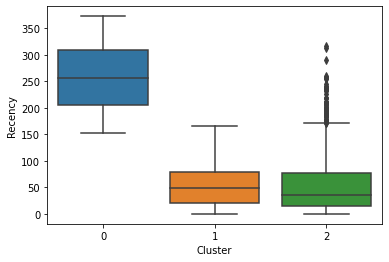

In [46]:
# Recency corresponding to the three clusters

sns.boxplot(x="Cluster", y="Recency", data=grouped_df)
plt.show()

- Cluster 0 is the least valuable and cluster 2 is the most valuable in terms of recency also

#### Using this, the business can get some insights on the type of marketing campaign they should carry out for each type of customers

## Hierarchical Clustering

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [48]:
rfm_df.head()

,Amount,Frequency,Recency
0,0.000000,0.010204,0.871314
1,0.995350,0.734694,0.048257
2,0.189380,0.163265,0.828418
3,0.875210,0.959184,0.093834
4,0.050403,0.030612,0.544236


#### Single Linkage

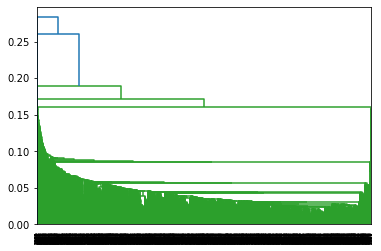

In [50]:
mergings = linkage(rfm_df, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

This is not interpretable because it's single linkage, which is unstable

#### Complete Linkage

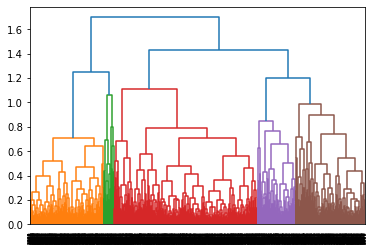

In [51]:
mergings = linkage(rfm_df, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [59]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [2]])

In [60]:
hierarchical_cluster = cut_tree(mergings, n_clusters=3).reshape((-1,))

In [61]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster
0,12346.0,0.00,2,325,0
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
5,12352.0,1545.41,95,35,2
6,12353.0,89.00,4,203,0


In [62]:
grouped_df["Hierarchical_Cluster"] = hierarchical_cluster
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster,Hierarchical_Cluster
0,12346.0,0.00,2,325,0,0
3,12349.0,1757.55,73,18,2,1
4,12350.0,334.40,17,309,0,0
5,12352.0,1545.41,95,35,2,1
6,12353.0,89.00,4,203,0,0


Let's rename the KMeans Cluster

In [63]:
grouped_df.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency', 'Cluster',
       'Hierarchical_Cluster'],
      dtype='object')

In [64]:
grouped_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'KMeans_Cluster', 'Hierarchical_Cluster']
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,KMeans_Cluster,Hierarchical_Cluster
0,12346.0,0.00,2,325,0,0
3,12349.0,1757.55,73,18,2,1
4,12350.0,334.40,17,309,0,0
5,12352.0,1545.41,95,35,2,1
6,12353.0,89.00,4,203,0,0


#### Note that cluster no. themselves are meaningless, the meaning is in the difference between different clusters

Amount

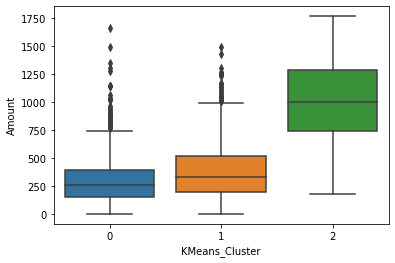

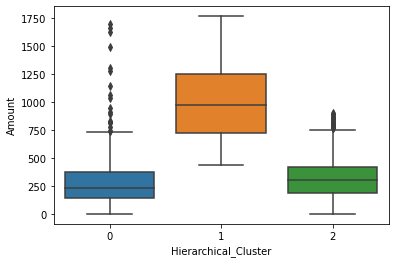

In [66]:
sns.boxplot(x="KMeans_Cluster", y="Amount", data=grouped_df)
plt.figure()
sns.boxplot(x="Hierarchical_Cluster", y="Amount", data=grouped_df)
plt.show()

#### The cluster 1 in KMeans is the same as cluster 2 in Hierarchical clustering. Let's interchange value of cluster 1 and 2 in hierarchical clustering

In [69]:
# function to interchange 1 and 2 in Hierarchical Clustering values

def interchange(x):
    if x == 1:
        return 2
    if x == 2:
        return 1
    else:
        return x

In [71]:
grouped_df.Hierarchical_Cluster = grouped_df.Hierarchical_Cluster.apply(interchange)

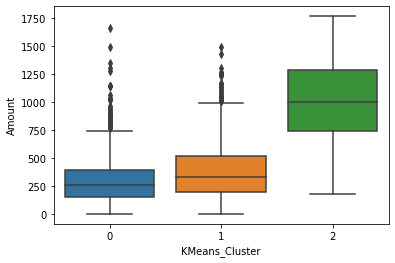

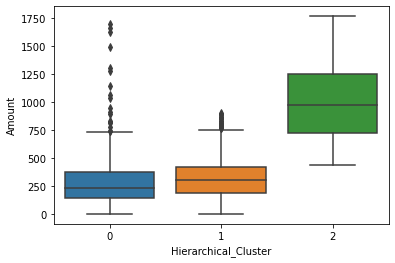

In [72]:
sns.boxplot(x="KMeans_Cluster", y="Amount", data=grouped_df)
plt.figure()
sns.boxplot(x="Hierarchical_Cluster", y="Amount", data=grouped_df)
plt.show()

Frequency

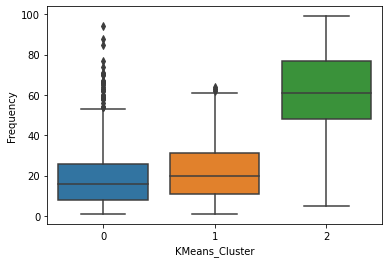

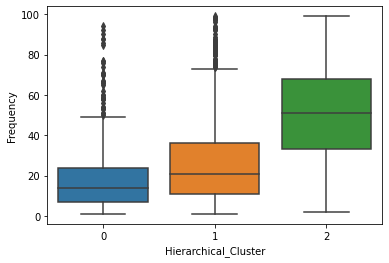

In [73]:
sns.boxplot(x="KMeans_Cluster", y="Frequency", data=grouped_df)
plt.figure()
sns.boxplot(x="Hierarchical_Cluster", y="Frequency", data=grouped_df)
plt.show()

Recency

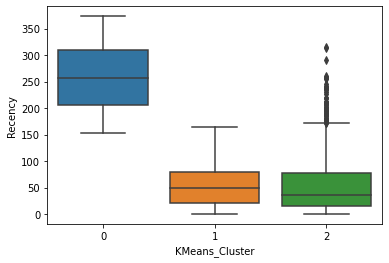

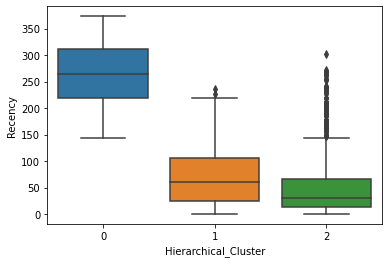

In [74]:
sns.boxplot(x="KMeans_Cluster", y="Recency", data=grouped_df)
plt.figure()
sns.boxplot(x="Hierarchical_Cluster", y="Recency", data=grouped_df)
plt.show()

#### It's clearly visible that the clusters obtained are exactly the same for KMeans and Hierarchical Clustering but this may not be the case everytime because the process of making clusters is different in both the algorithms.

##### Hierarchical Clustering

- hierarchical clustering is computationally expensive
- it removes the need to find the best value of n_clusters
- you can see the grouping of the data using the dendrogram

##### KMeans Clustering

- Kmeans is computationally better
- Better for simpler problems

#### Practically -

- create hierarchical clustering
- save the clustering for n_clusters = 3 to 15 in a dataframe/excel sheet
- identify the correct number of clusters based on data separation and business understanding
- obtain the centroids of the number of clusters you decided. You can do it by taking the average of each kpi for each cluster number
- train the KMeans by specifying n_clusters and centroids beforehand so that the algorithm converges faster, correctly